In [1]:
# parse xml file
import xml.etree.ElementTree as ET

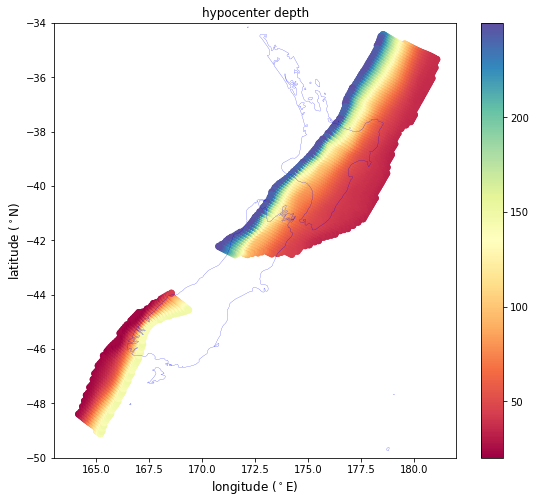

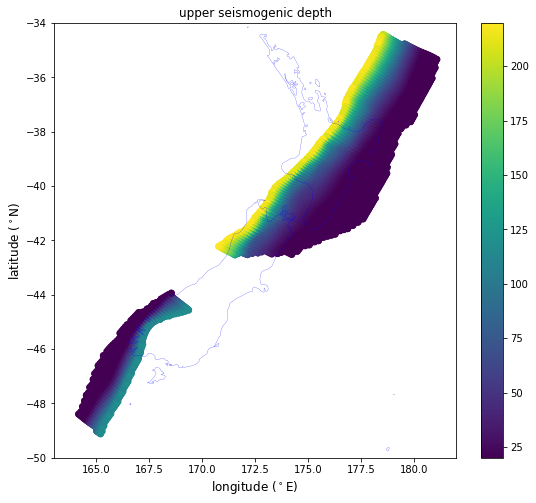

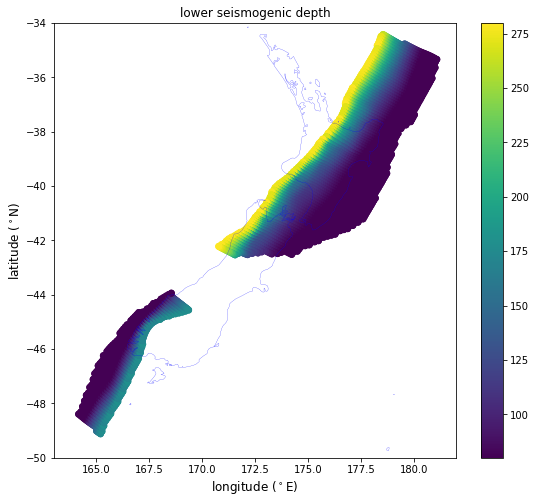

In [2]:
xmlfile = 'slab-uniform-1depth-rates.xml'
root = ET.parse(xmlfile).getroot()
lon, lat, dep, upseis, lowseis = [], [], [], [], []

gml = '{http://openquake.org/xmlns/nrml/0.4}'

for elem in root:
     for pointsource in elem:
        # print(a.tag.title(), a.attrib.get('name', a.text))
        if (pointsource.attrib['tectonicRegion'])!='Subduction Intraslab':
            print('erroneous tectonic region')
        #print(list(pointsource))
        for item in list(pointsource):
            # print(list(item))
            for entry in list(item):
                if entry.tag == '{http://www.opengis.net/gml}'+'Point':
                    #  print('here')
                    for pos in entry:
                        lonlat = pos.text.split(' ')
                        lon.append(float(lonlat[0]))
                        lat.append(float(lonlat[1]))
                if entry.tag == gml+'upperSeismoDepth':
                    upseis.append(float(entry.text))
                if entry.tag == gml+'lowerSeismoDepth':
                    lowseis.append(float(entry.text))
            if item.tag == gml+'hypoDepthDist':
                for hypo in item:
                    dep.append(float(hypo.attrib['depth']))

import matplotlib.pyplot as plt
import nzborders as nzb
xlon = []
for x in lon:
    if x<0:
        xlon.append(360+x)
    else:
        xlon.append(x)
fig, ax = plt.subplots(figsize=(9,8))
sc = ax.scatter(xlon, lat, c=dep, cmap='Spectral')
ax.set_xlim([163, 182])
ax.set_ylim([-50, -34])
ax.set_title('hypocenter depth')
nzb.plot(file='nzborders.json',plinewidth= 0.2, pcolor = 'b', ax=ax)
fig.colorbar(sc, ax=ax);
plt.show()

fig, ax = plt.subplots(figsize=(9,8))
sc = ax.scatter(xlon, lat, c=upseis)
ax.set_xlim([163, 182])
ax.set_ylim([-50, -34])
ax.set_title('upper seismogenic depth')
nzb.plot(file='nzborders.json',plinewidth= 0.2, pcolor = 'b', ax=ax)
fig.colorbar(sc, ax=ax);

plt.show()

fig, ax = plt.subplots(figsize=(9,8))
sc = ax.scatter(xlon, lat, c=lowseis)
ax.set_xlim([163, 182])
ax.set_ylim([-50, -34])
ax.set_title('lower seismogenic depth')
nzb.plot(file='nzborders.json',plinewidth= 0.2, pcolor = 'b', ax=ax)
fig.colorbar(sc, ax=ax);
plt.show()